In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
df=pd.read_csv(r'Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
pd.get_dummies(df['label']).sum()

0     26162
1    183431
dtype: int64

In [6]:
(df['msisdn'].duplicated()).value_counts()

False    186243
True      23350
Name: msisdn, dtype: int64

In [7]:
pd.get_dummies(df['pcircle']).value_counts()

UPW
1      209593
dtype: int64

In [8]:
df['pdate']

0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    2016-06-17
209589    2016-06-12
209590    2016-07-29
209591    2016-07-25
209592    2016-07-07
Name: pdate, Length: 209593, dtype: object

In [9]:
df['pdate']=pd.to_datetime(df['pdate'],errors='coerce')

In [10]:
df['year']= df['pdate'].dt.year
df['month']= df['pdate'].dt.month
df['day']= df['pdate'].dt.day

EDA

<AxesSubplot:xlabel='daily_decr30', ylabel='label'>

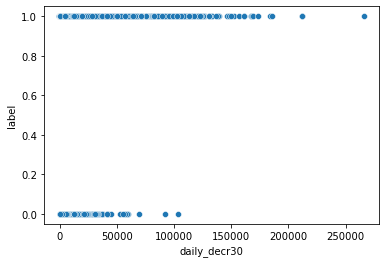

In [11]:
sns.scatterplot(x=df['daily_decr30'],y=df['label'])

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='label'>

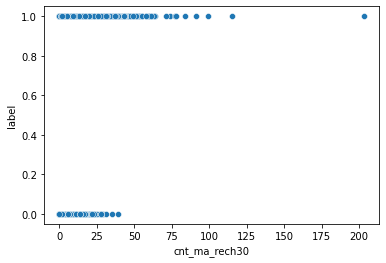

In [12]:
sns.scatterplot(x=df['cnt_ma_rech30'],y=df['label'])

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='label'>

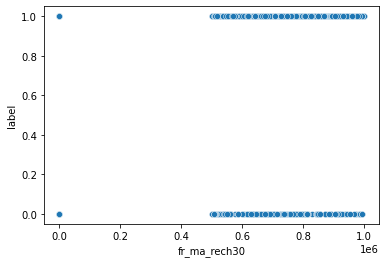

In [13]:
sns.scatterplot(x=df['fr_ma_rech30'],y=df['label'])

<AxesSubplot:xlabel='daily_decr90', ylabel='label'>

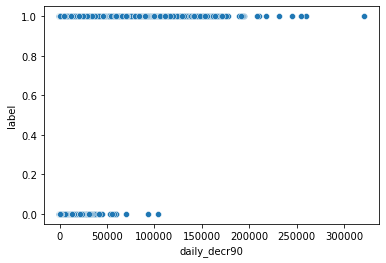

In [14]:
sns.scatterplot(x=df['daily_decr90'],y=df['label'])

<AxesSubplot:xlabel='rental30', ylabel='label'>

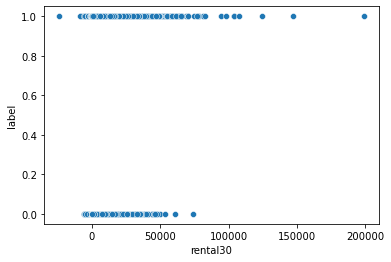

In [15]:
sns.scatterplot(x=df['rental30'],y=df['label'])

<AxesSubplot:xlabel='rental90', ylabel='label'>

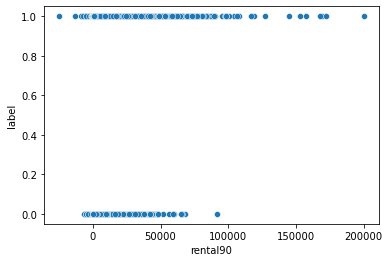

In [16]:
sns.scatterplot(x=df['rental90'],y=df['label'])

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='label'>

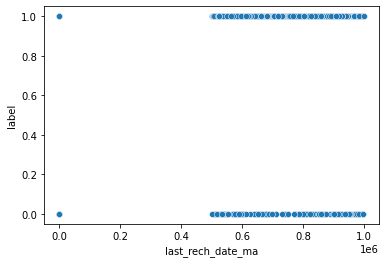

In [17]:
sns.scatterplot(x=df['last_rech_date_ma'],y=df['label'])

<AxesSubplot:xlabel='last_rech_date_da', ylabel='label'>

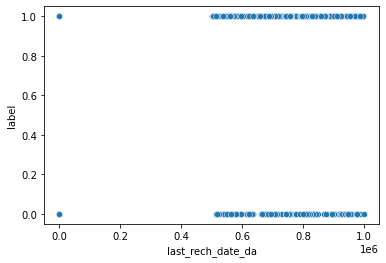

In [18]:
sns.scatterplot(x=df['last_rech_date_da'],y=df['label'])

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='label'>

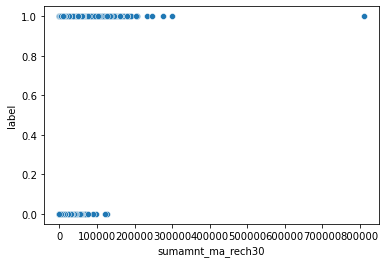

In [19]:
sns.scatterplot(x=df['sumamnt_ma_rech30'],y=df['label'])

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='label'>

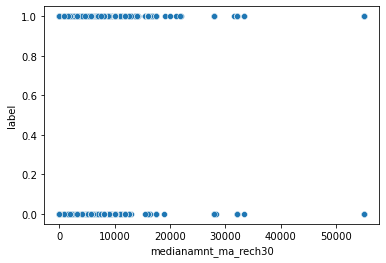

In [20]:
sns.scatterplot(x=df['medianamnt_ma_rech30'],y=df['label'])

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='label'>

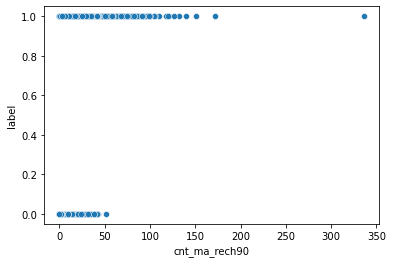

In [21]:
sns.scatterplot(x=df['cnt_ma_rech90'],y=df['label'])

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='label'>

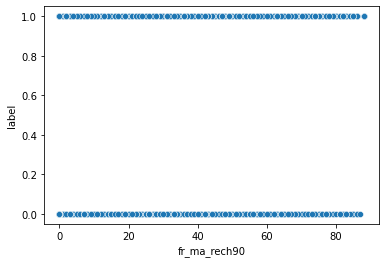

In [22]:
sns.scatterplot(x=df['fr_ma_rech90'],y=df['label'])

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='label'>

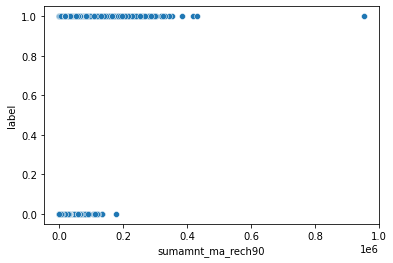

In [23]:
sns.scatterplot(x=df['sumamnt_ma_rech90'],y=df['label'])

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='label'>

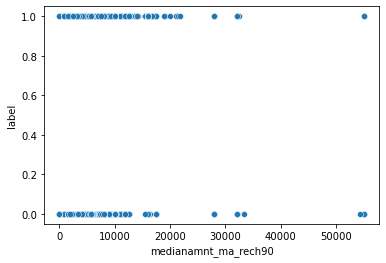

In [24]:
sns.scatterplot(x=df['medianamnt_ma_rech90'],y=df['label'])

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='label'>

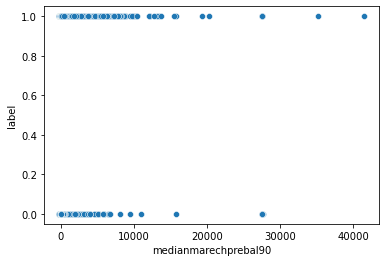

In [25]:
sns.scatterplot(x=df['medianmarechprebal90'],y=df['label'])

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='label'>

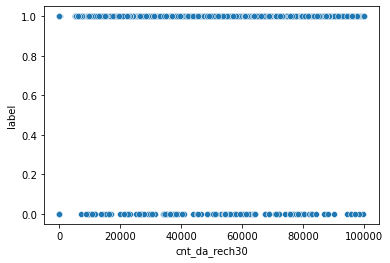

In [26]:
sns.scatterplot(x=df['cnt_da_rech30'],y=df['label'])

<AxesSubplot:xlabel='fr_da_rech30', ylabel='label'>

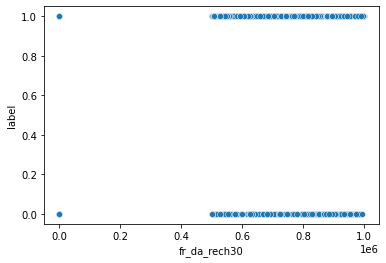

In [27]:
sns.scatterplot(x=df['fr_da_rech30'],y=df['label'])

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='label'>

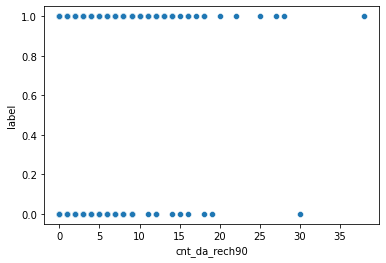

In [28]:
sns.scatterplot(x=df['cnt_da_rech90'],y=df['label'])

<AxesSubplot:xlabel='fr_da_rech90', ylabel='label'>

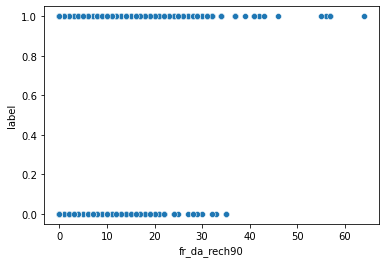

In [29]:
sns.scatterplot(x=df['fr_da_rech90'],y=df['label'])

<AxesSubplot:xlabel='cnt_loans30', ylabel='label'>

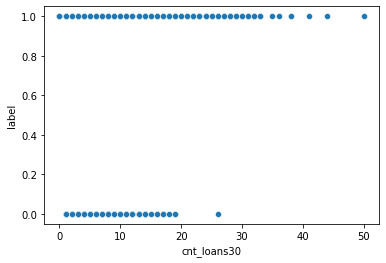

In [30]:
sns.scatterplot(x=df['cnt_loans30'],y=df['label'])

<AxesSubplot:xlabel='amnt_loans30', ylabel='label'>

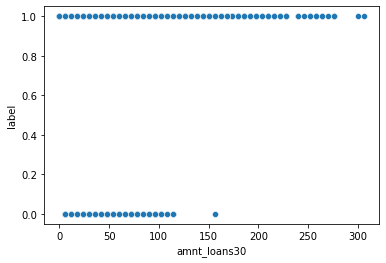

In [31]:
sns.scatterplot(x=df['amnt_loans30'],y=df['label'])

<AxesSubplot:xlabel='cnt_loans90', ylabel='label'>

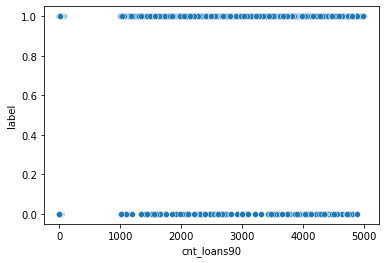

In [32]:
sns.scatterplot(x=df['cnt_loans90'],y=df['label'])

<AxesSubplot:xlabel='amnt_loans90', ylabel='label'>

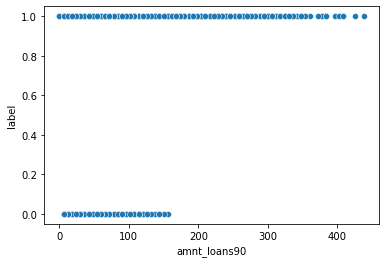

In [33]:
sns.scatterplot(x=df['amnt_loans90'],y=df['label'])

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='label'>

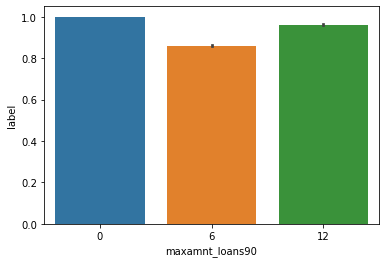

In [34]:
sns.barplot(x=df['maxamnt_loans90'],y=df['label'])

In [35]:
len(df['maxamnt_loans30'].unique())

1050

In [36]:
df = df.drop(df[df.maxamnt_loans30 > 12].index)

In [37]:
df.shape

(208546, 40)

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='label'>

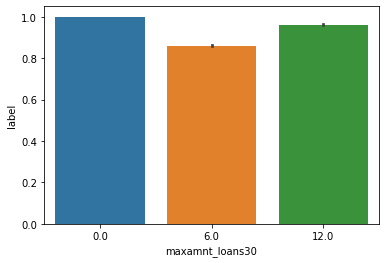

In [38]:
sns.barplot(x=df['maxamnt_loans30'],y=df['label'])

In [39]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'year', 'month', 'day'],
      dtype='object')

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='label'>

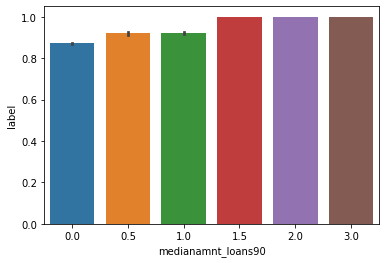

In [40]:
sns.barplot(x=df['medianamnt_loans90'],y=df['label'])

<AxesSubplot:xlabel='payback30', ylabel='label'>

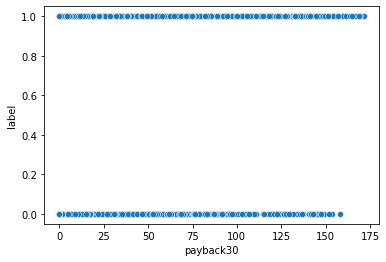

In [41]:
sns.scatterplot(x=df['payback30'],y=df['label'])

<AxesSubplot:xlabel='month', ylabel='payback90'>

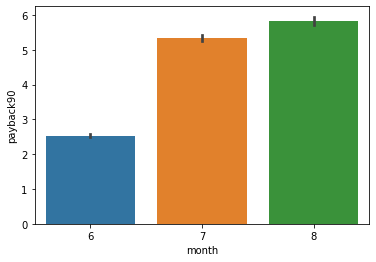

In [42]:
sns.barplot(x=df['month'],y=df['payback90'])

In [43]:
df.drop(['Unnamed: 0','pcircle','pdate','year'],axis=1,inplace=True)

In [44]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
day                     0
dtype: int64

In [45]:
df['msisdn'] = le.fit_transform(df['msisdn'])

In [46]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,...,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000
mean,0.875169,92694.100280,8129.800502,5382.176429,6083.328238,2692.977029,3484.126461,3753.245773,3716.538130,2064.445158,...,6.657840,0.053945,18.486489,23.649056,6.703327,0.045978,3.400163,4.323063,6.797488,14.397409
std,0.330528,53520.503977,75789.889949,9221.838881,10920.483633,4309.893601,5772.799363,53885.607334,53402.052249,2371.554162,...,2.152741,0.217876,224.514793,26.485791,2.103928,0.200486,8.822465,10.314159,0.741324,8.437661
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,46310.250000,246.000000,42.470500,42.704167,280.600000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,92667.500000,527.000000,1471.000000,1500.000000,1084.220000,1334.850000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.000000
75%,1.000000,139015.000000,982.000000,7243.000000,7800.585000,3356.900000,4202.640000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.000000
max,1.000000,185424.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.000000


Checking Correlation

In [47]:
df.corr()['label'].sort_values()

fr_da_rech90           -0.005501
medianmarechprebal30   -0.004689
aon                    -0.003786
fr_da_rech30            0.000027
fr_ma_rech30            0.001237
last_rech_date_da       0.001874
msisdn                  0.001968
cnt_da_rech90           0.002911
last_rech_date_ma       0.003759
cnt_da_rech30           0.004016
cnt_loans90             0.004818
day                     0.006629
medianamnt_loans90      0.035670
medianmarechprebal90    0.039173
medianamnt_loans30      0.044536
payback30               0.048238
payback90               0.049131
rental30                0.057973
maxamnt_loans30         0.074167
rental90                0.075421
maxamnt_loans90         0.084053
fr_ma_rech90            0.084369
medianamnt_ma_rech90    0.120658
last_rech_amt_ma        0.131552
medianamnt_ma_rech30    0.141191
month                   0.154894
daily_decr90            0.166077
daily_decr30            0.168217
cnt_loans30             0.196170
amnt_loans30            0.197150
amnt_loans

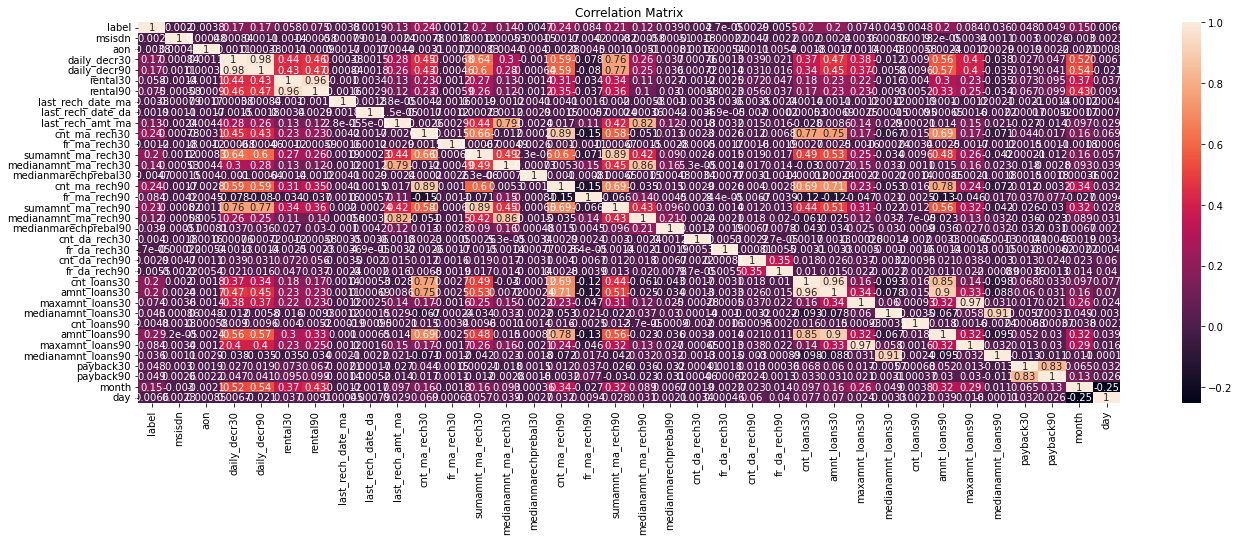

In [48]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Checking multicollinearity

In [49]:
x1 = df.drop(['label'],axis=1)
y1 = df['label']

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[-0.98403831, -0.10367899, -0.2523501 , ...,  2.39253596,
         0.27317624,  0.66399976],
       [ 0.91499544, -0.09787345,  0.73085637, ..., -0.41913969,
         1.62211691, -0.52116569],
       [-1.10683267, -0.10020886, -0.43203813, ..., -0.41913969,
         1.62211691,  0.54548321],
       ...,
       [-0.72720155, -0.09390194,  0.70061414, ..., -0.04748142,
         0.27317624,  1.73064866],
       [ 0.33998079, -0.08441516,  0.77056963, ...,  0.5988808 ,
         0.27317624,  1.25658248],
       [ 0.52368653, -0.08640752, -0.09681546, ..., -0.41913969,
         0.27317624, -0.87671532]])

In [51]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,1.000208,msisdn
1,1.000189,aon
2,29.665513,daily_decr30
3,32.351657,daily_decr90
4,13.294020,rental30
5,14.174226,rental90
6,1.000142,last_rech_date_ma
7,1.000150,last_rech_date_da
8,3.431198,last_rech_amt_ma
9,15.057295,cnt_ma_rech30


Checking skewness

In [52]:
df.skew()

label                   -2.270142
msisdn                   0.000695
aon                     10.381028
daily_decr30             3.949007
daily_decr90             4.255740
rental30                 4.529371
rental90                 4.444019
last_rech_date_ma       14.794160
last_rech_date_da       14.803511
last_rech_amt_ma         3.788305
cnt_ma_rech30            3.286169
fr_ma_rech30            14.765036
sumamnt_ma_rech30        6.402504
medianamnt_ma_rech30     3.518825
medianmarechprebal30    14.768321
cnt_ma_rech90            3.425067
fr_ma_rech90             2.285936
sumamnt_ma_rech90        4.905514
medianamnt_ma_rech90     3.759065
medianmarechprebal90    44.907213
cnt_da_rech30           17.815473
fr_da_rech30            14.790531
cnt_da_rech90           27.247194
fr_da_rech90            28.990106
cnt_loans30              2.713831
amnt_loans30             2.977827
maxamnt_loans30          1.428561
medianamnt_loans30       4.556332
cnt_loans90             16.620254
amnt_loans90  

In [53]:
df.drop(['month','day'],axis=1,inplace=True)

Checking outliers

label                      AxesSubplot(0.125,0.816017;0.168478x0.0639831)
msisdn                  AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
aon                     AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
daily_decr30            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
daily_decr90               AxesSubplot(0.125,0.739237;0.168478x0.0639831)
rental30                AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
rental90                AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
last_rech_date_ma       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
last_rech_date_da          AxesSubplot(0.125,0.662458;0.168478x0.0639831)
last_rech_amt_ma        AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
cnt_ma_rech30           AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
fr_ma_rech30            AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
sumamnt_ma_rech30          AxesSubplot(0.125,0.585678;0.168478x0.0639831)
medianamnt_ma_rech30    AxesSubplot(0.

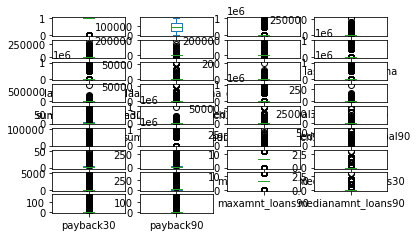

In [54]:
df.plot(kind='box',subplots=True,layout=(10,4))

Data loss

Data_loss = ((208546-160511)/208546)*100
Data_loss is more than 20% hence we havent removed outliers.

Balancing Target column - fraud_reported

In [55]:
x = df.drop(['label'],axis=1)
y = df['label']

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smt = SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [58]:
trainx.value_counts()

msisdn  aon          daily_decr30  daily_decr90  rental30     rental90     last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90
25747   143.000000   3.200000      3.200000      11.160000    11.160000    1.000000           0.0                777               1              0.000000      777.00000          777.000000            98.500000             3              0             1723               773.000000            52.500000             0.0            0.0           0              0             2            12            6.000000         0.0                 2.0          12            6             

In [59]:
trainy.value_counts()

0    182513
1    182513
Name: label, dtype: int64

In [63]:
model = [DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.8915896695141086
Accuracy score for random state:  0  is  0.9356959629417478
Accuracy score for random state:  0  is  0.8509534364389544
Accuracy score for random state:  0  is  0.7367153969400377
Accuracy score for random state:  1  is  0.8901451946305382
Accuracy score for random state:  1  is  0.9365178193410206
Accuracy score for random state:  1  is  0.8525805460779187
Accuracy score for random state:  1  is  0.738774188728115
Accuracy score for random state:  2  is  0.8888999576619431
Accuracy score for random state:  2  is  0.934558646510431
Accuracy score for random state:  2  is  0.8505632621887945
Accuracy score for random state:  2  is  0.7372383964668476
Accuracy score for random state:  3  is  0.89187192322699
Accuracy score for random state:  3  is  0.9352227728936817
Accuracy score for random state:  3  is  0.8490191683477366
Accuracy score for random state:  3  is  0.7378527133713546
Accuracy score for random state:  4  is  0.8

Highest accuracy 0.9365427240803925 is at random state 5 and model is Random Forest Classifier.

In [61]:
Rfc = RandomForestClassifier()

In [62]:
score = cross_val_score(Rfc,trainx,trainy,cv=5)

In [63]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.80207106 0.96294774 0.96046846 0.96229025 0.96293405]
Mean Score:  0.9301423133454897
std Score:  0.06404202452106364
